### Metrics TR-MSE

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tnrange, tqdm_notebook
from utils import tr_mse_fit, tr_mse
from os import listdir
from PIL import Image

Using TensorFlow backend.


In [2]:
dataset_path = '../data/sand'
trend_num = 3
r = 3

In [3]:
train_mse, val_mse, tmse, vmse = tr_mse_fit(dataset_path, 3, 3)

Train dataset:   0%|          | 1/3325 [00:00<08:51,  6.26it/s]

Found 3325 train samples
Found 175 validation samples


Validation dataset: 100%|██████████| 175/175 [00:14<00:00, 11.85it/s]

Dir already exist
Metrics saved successfully.


In [3]:
tmse = np.load('../data/sand/trend3/metrics/tmse.npy')
vmse = np.load('../data/sand/trend3/metrics/vmse.npy')

In [15]:
nn_out_list = listdir('trained_models/sand/trend3/nf32_woUnet/nn_output')
N = len(nn_out_list)
err_nf32_woUnet = 0
earr_nf32_woUnet = np.zeros(251)
tr_nf32_woUnet = np.zeros(251)
for file in tqdm_notebook(nn_out_list, desc='NN output'):
    image = Image.open('trained_models/sand/trend3/nf32_woUnet/nn_output/' + file)
    err_nf, earr_nf, tr_nf = tr_mse(image, tmse, r)
    err_nf32_woUnet += err_nf
    earr_nf32_woUnet += earr_nf
    tr_nf32_woUnet += tr_nf
err_nf32_woUnet /= N
earr_nf32_woUnet /= N
tr_nf32_woUnet /= N
np.save('trained_models/sand/trend3/nf32_woUnet/err.npy', err_nf32_woUnet)
np.save('trained_models/sand/trend3/nf32_woUnet/earr.npy', earr_nf32_woUnet)
np.save('trained_models/sand/trend3/nf32_woUnet/tr.npy', tr_nf32_woUnet)

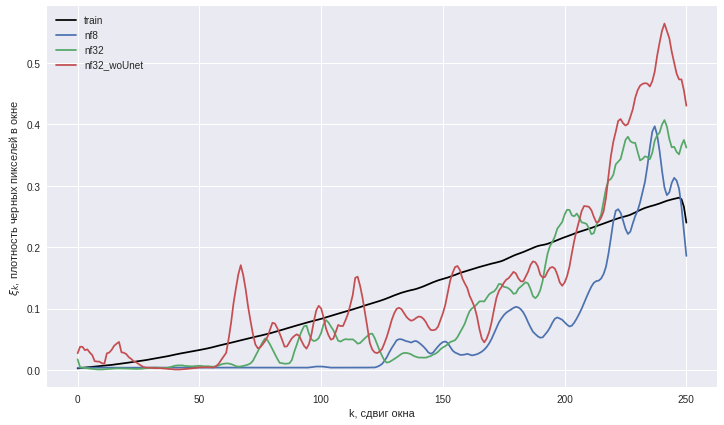

In [35]:
plt.figure(figsize=(12, 7))
plt.plot(tmse, label='train', color='black')
plt.plot(tr_nf8, label='nf8')
plt.plot(tr_nf32, label='nf32')
plt.plot(tr_nf32_woUnet, label='nf32_woUnet')
plt.xlabel('k, сдвиг окна')
plt.ylabel(r'$\xi_k$, плотность черных пикселей в окне')
plt.legend()
plt.savefig('../text/Universiade/graphs/tr_1.png')

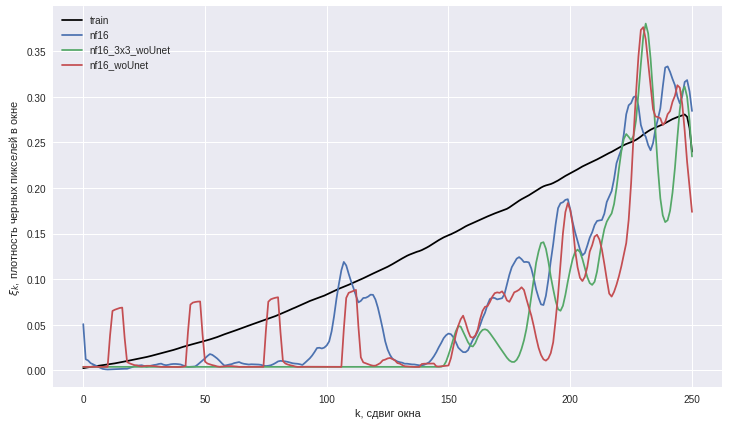

In [36]:
plt.figure(figsize=(12, 7))
plt.plot(tmse, label='train', color='black')
plt.plot(tr_nf16, label='nf16')
plt.plot(tr_nf16_3x3_woUnet, label='nf16_3x3_woUnet')
plt.plot(tr_nf16_woUnet, label='nf16_woUnet')
plt.xlabel('k, сдвиг окна')
plt.ylabel(r'$\xi_k$, плотность черных пикселей в окне')
plt.legend()
plt.savefig('../text/Universiade/graphs/tr_2.png')

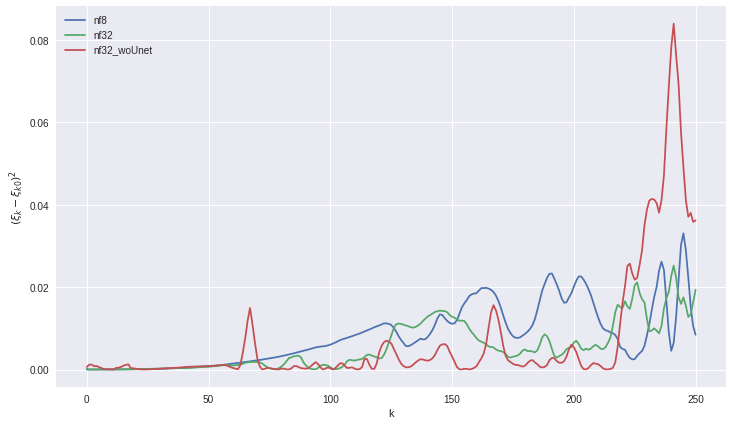

In [32]:
plt.figure(figsize=(12, 7))
#plt.plot(tmse, label='train', color='black')
plt.plot(earr_nf8, label='nf8')
plt.plot(earr_nf32, label='nf32')
plt.plot(earr_nf32_woUnet, label='nf32_woUnet')
plt.xlabel('k')
plt.ylabel(r'$(\xi_k - \xi_{k0} )^2$')
plt.legend()
plt.savefig('../text/Universiade/graphs/earr_1.png')

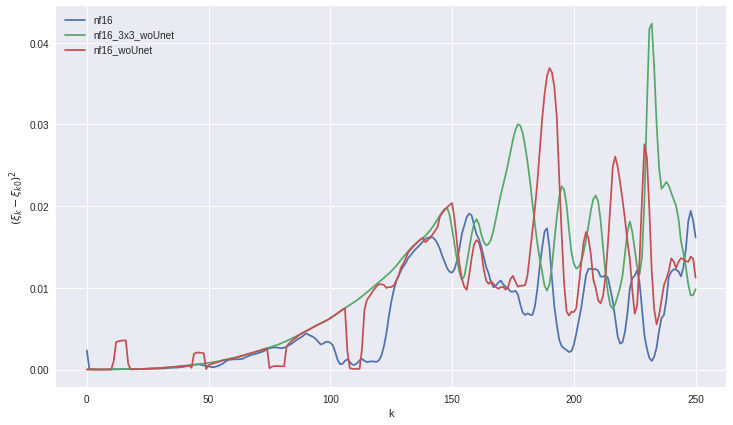

In [33]:
plt.figure(figsize=(12, 7))
#plt.plot(tmse, label='train', color='black')
plt.plot(earr_nf16, label='nf16')
plt.plot(earr_nf16_3x3_woUnet, label='nf16_3x3_woUnet')
plt.plot(earr_nf16_woUnet, label='nf16_woUnet')
plt.xlabel('k')
plt.ylabel(r'$(\xi_k - \xi_{k0} )^2$')
plt.legend()
plt.savefig('../text/Universiade/graphs/earr_2.png')

In [34]:
print('err_nf8 = {}'.format(err_nf8))
print('err_nf16 = {}'.format(err_nf16))
print('err_nf16_woUnet = {}'.format(err_nf16_woUnet))
print('err_nf16_3x3_woUnet = {}'.format(err_nf16_3x3_woUnet))
print('err_nf32 = {}'.format(err_nf32))
print('err_nf32_woUnet = {}'.format(err_nf32_woUnet))

err_nf8 = 0.008248612939535604
err_nf16 = 0.006061775239693987
err_nf16_woUnet = 0.008809678842624662
err_nf16_3x3_woUnet = 0.01033687898221956
err_nf32 = 0.005488744732355762
err_nf32_woUnet = 0.006884924850100957
